In [4]:
import rescomp as rc
import numpy as np
import findiff as fd
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [10, 10]

## Using the derivative to measure accurate attractor recreation

In [2]:
def oldderivativenorm(t, U, system, order=2):
    dt = np.mean(np.diff(t))
    Udiff = np.gradient(U, dt, axis=0)
    Uprime = rc.SYSTEMS[system]['df'](t, U)
    if order == 2:
        # L2 norm
        return np.mean(np.sum((Udiff - Uprime)**2)**0.5)
    if order == 'inf':
        return np.max(np.abs(Udiff - Uprime))

def derivativenorm(t, U, system, order="inf"):
    dt = np.mean(np.diff(t))
    ddt = fd.FinDiff(0, dt, acc=6)
    df = rc.SYSTEMS[system]['df']
    err = ddt(U) - df(t, U)
    if order == "inf":
        return np.max(np.abs(err))
    if order == 2:
        return np.mean(np.sum(err**2, axis=1)**0.5)

In [89]:
# Initial guesses
PRMS = {
    "res_sz": 100,
    "activ_f": np.tanh,
    "mean_degree": 2.0,
    "ridge_alpha": 1e-6,
    "spect_rad": 2.0,
    "gamma": 10.,
    "sigma": .1,
    "uniform_weights": True,
    "sparse_res": True,
    "signal_dim": 3
}

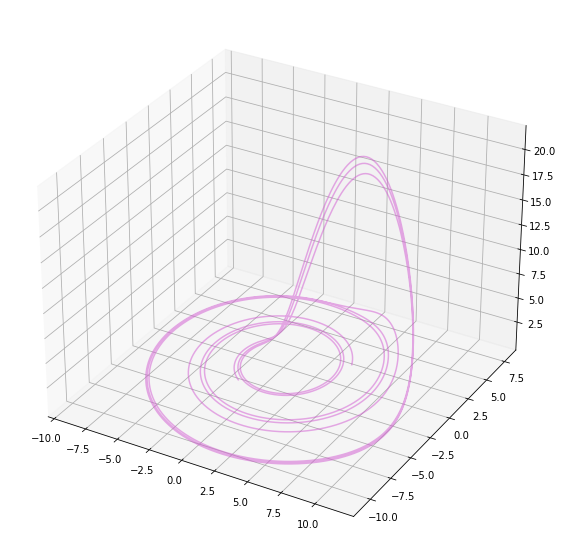

Derivative Norm:  2.2304735273870335e-05


In [90]:
t0, U0 = rc.orbit("rossler", duration=50, trim=True)
rc.plot3d(U0)
print("Derivative Norm: ", derivativenorm(t0, U0, "rossler"))

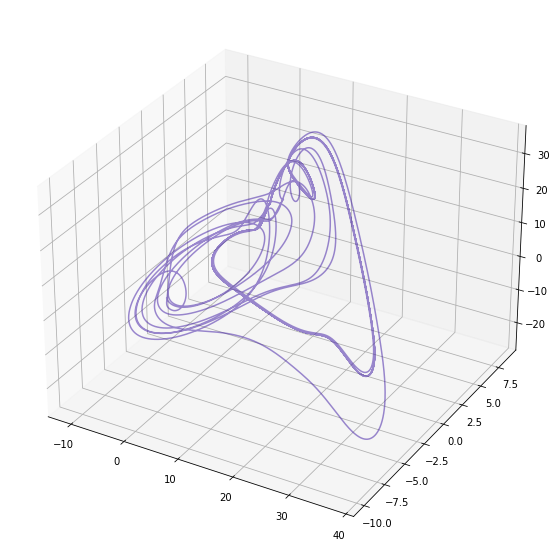

Derivative Norm:  769.4616100334148


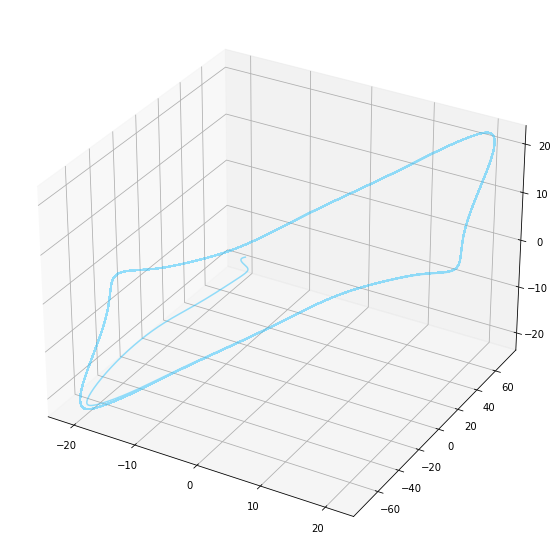

Derivative Norm:  621.6652980257126


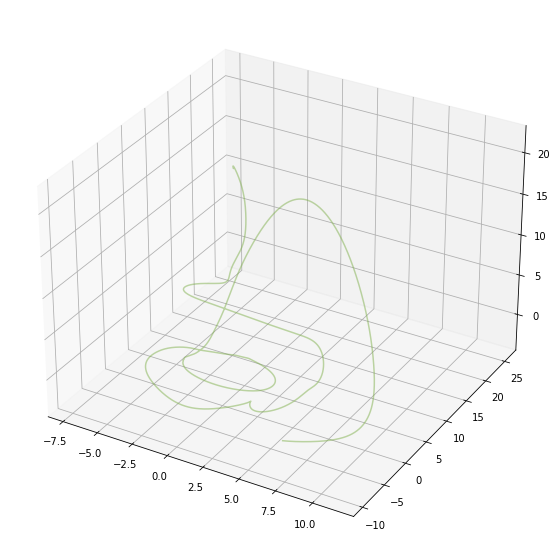

Derivative Norm:  133.8498758520104


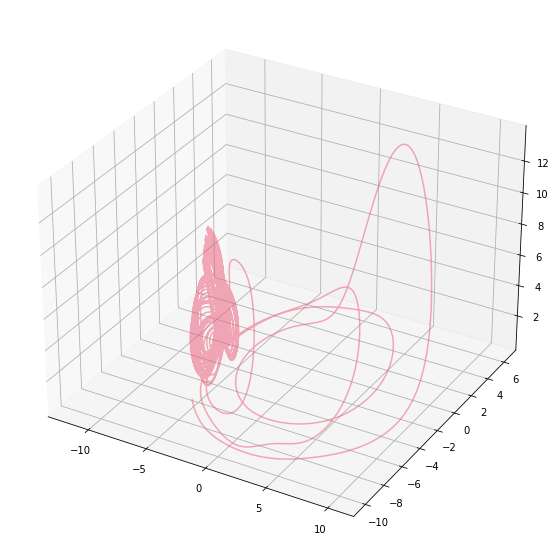

Derivative Norm:  100.97717817259988


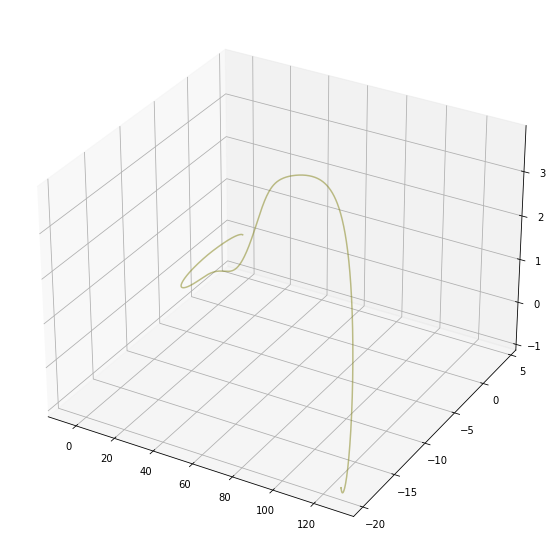

Derivative Norm:  695.6065518922043


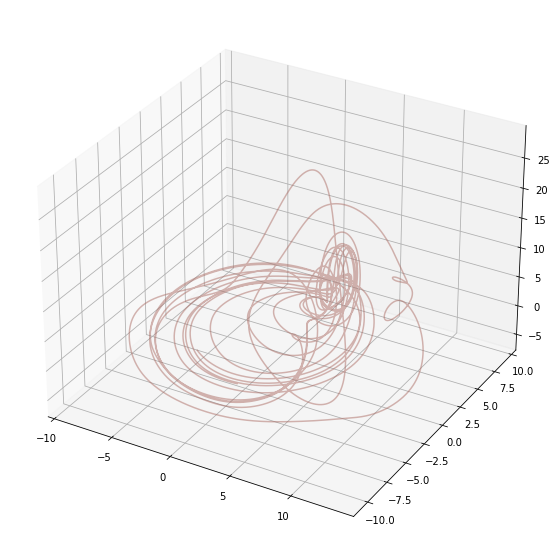

Derivative Norm:  51.16835225979139


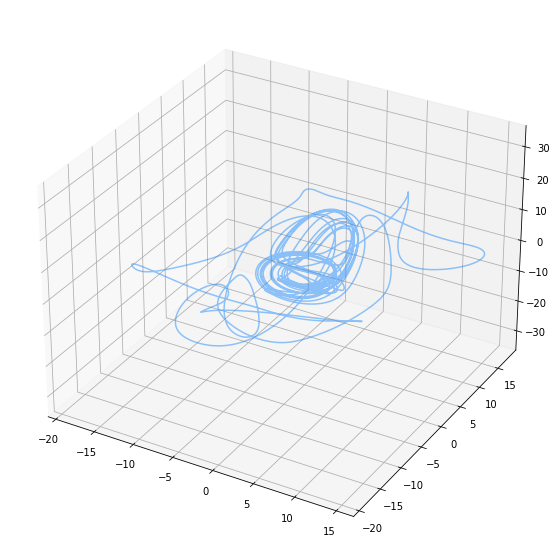

Derivative Norm:  736.2832340411138


/usr/local/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


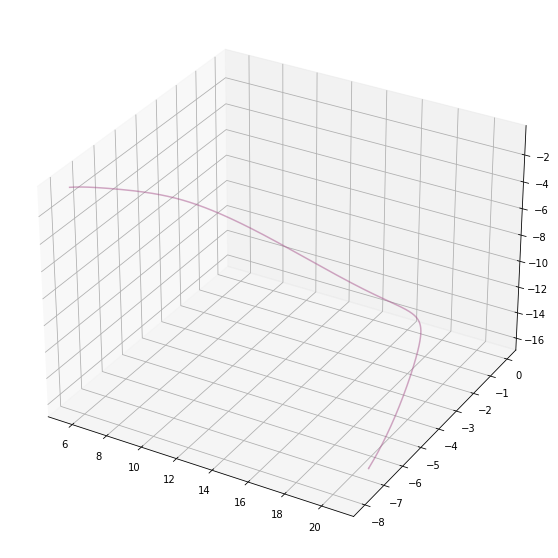

Derivative Norm:  246.16620922268407


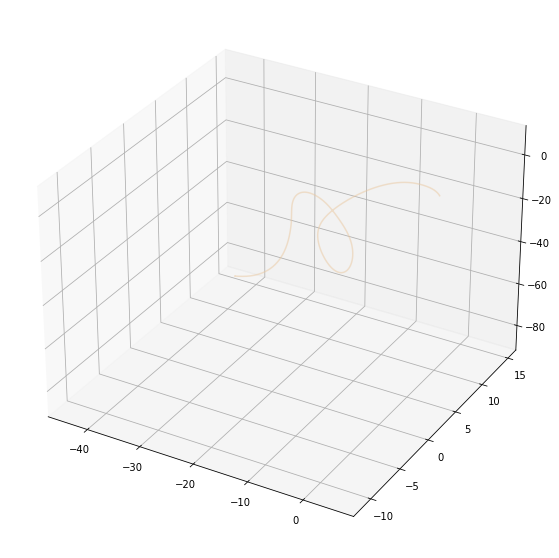

Derivative Norm:  4463.81369618354


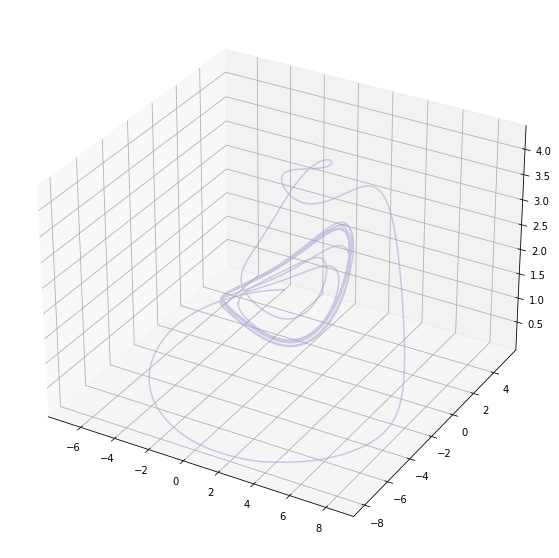

Derivative Norm:  22.218775815863196


In [91]:
dt = .001
for i in range(10):
    t, U = rc.orbit("rossler", duration=50, trim=True, dt=dt)
    rcomp = rc.ResComp(**PRMS)
    rcomp.train(t, U)
    u0 = U[0,:] + np.random.randn(3)*1e-4
    ts = np.arange(0, 100, dt)
    pre = rcomp.predict(ts, u0)
    rc.plot3d(pre)
    print("Derivative Norm: ", derivativenorm(ts, pre, "rossler", order="inf"))

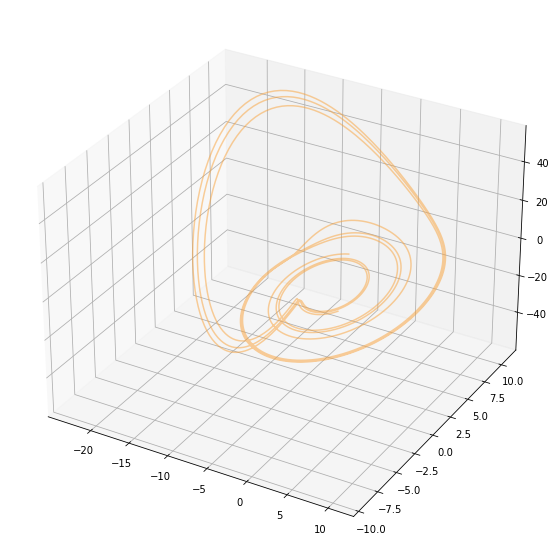

array([0.97680696, 0.63023361, 0.22076599])

In [92]:
rc.plot3d(rc.rossler(t0, U0))

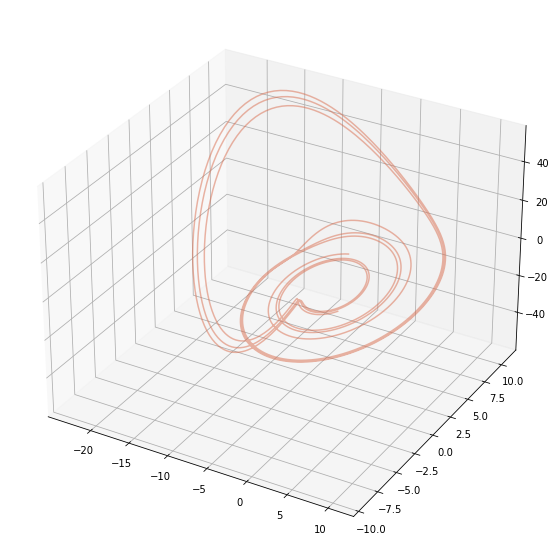

array([0.85046303, 0.42545968, 0.30042938])

In [93]:
rc.plot3d(np.gradient(U0, .01, axis=0))

### Numerical Diff Practice

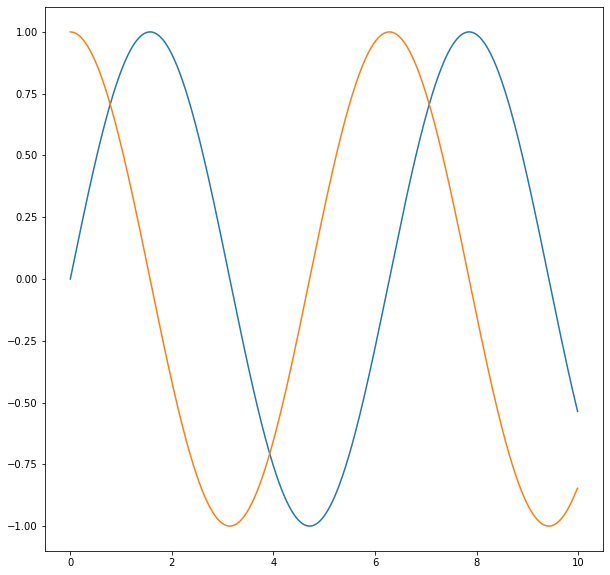

In [2]:
dt = 0.01
t = np.arange(0,10, dt)
y = np.sin(t)
yprime = np.gradient(y, dt)
plt.plot(t, y)
plt.plot(t, yprime)

In [8]:
dt = 0.01
t, U = rc.orbit("lorenz", dt=dt)
Uprime = rc.lorenz(t, U)

In [9]:
Uprime.shape

(1001, 3)

In [10]:
Udiff = np.gradient(U, dt, axis=0)
Udiff.shape

(1001, 3)

In [11]:
L2 = np.mean(np.sum((Udiff - Uprime)**2, axis=0)**0.5)
print("L2: ", L2)

L2:  13.750840309307593


In [12]:
Linf = np.max(np.abs(Udiff - Uprime))
print("Linf: ", Linf)

Linf:  12.067309166782167


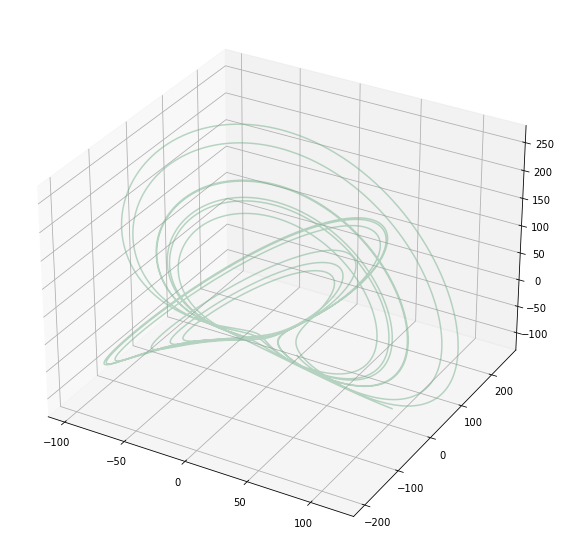

array([0.46145923, 0.68977603, 0.54946912])

In [68]:
rc.plot3d(Udiff)

In [72]:
x, y, z = np.random.rand(3)

In [73]:
np.hstack((1,2,3))

array([1, 2, 3])

In [10]:
np.random.rand(3, 1).shape

(3, 1)

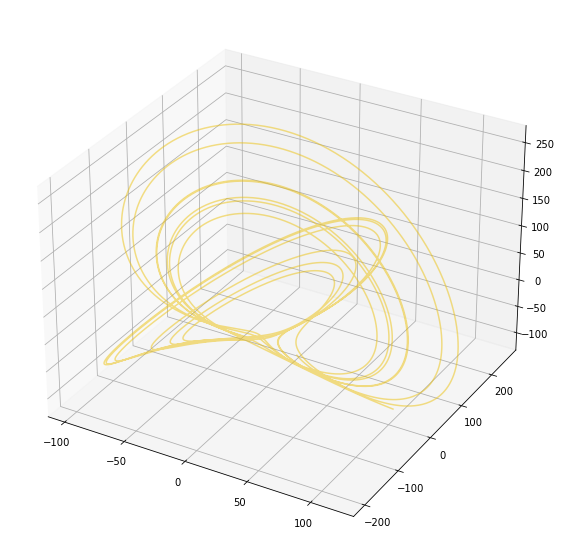

array([0.92719272, 0.75745281, 0.05069623])

In [69]:
rc.plot3d(Uprime)

In [70]:
U.shape

(10001, 3)

## Compare derivative norm here to the relative error 
(In `utils.py`)

In [59]:
LORENZPRMS = {
    "res_sz" : 1000,
    "activ_f" : lambda x: 1/(1 + np.exp(-1*x)),
    "gamma" : 19.1,
    "mean_degree" : 2.0,
    "ridge_alpha" : 6e-7,
    "sigma" : 0.063,
    "spect_rad" : 8.472
}

t, U = rc.orbit("lorenz", dt=0.01)

In [60]:
rcomp = rc.ResComp(**LORENZPRMS)
rcomp.train(t, U)

In [61]:
pre = rcomp.predict(t, U[0])

### Prediction Norm

In [62]:
derivativenorm(t, pre, "lorenz", order="inf")

152718.8645901939

In [63]:
rc.system_fit_error(t, pre, "lorenz", order="inf")

9.0

## True Solution Norm

In [64]:
derivativenorm(t, U, "lorenz", order=2)

17.85832223718818

In [65]:
rc.system_fit_error(t, U, "lorenz", order=2)

19.737512044813233

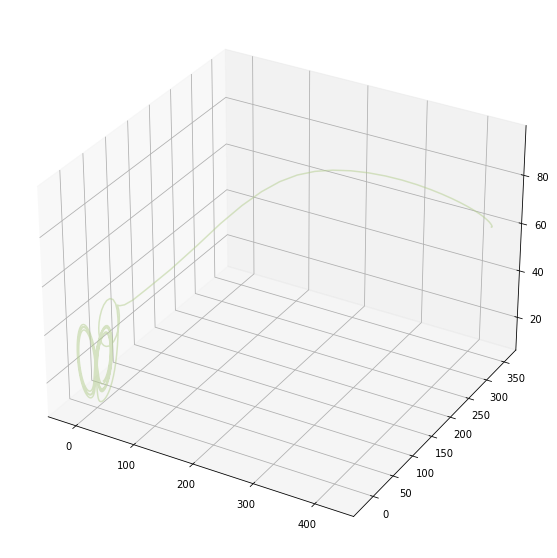

array([0.70002941, 0.80203717, 0.55344006])

In [67]:
rc.plot3d(pre)

## Notes

Changing the time step affects all of the parameters! Need new hyper parameters for smaller $dt$

In [80]:
xt = U[:, 0]
d_dt = fd.FinDiff(0, 0.01, acc=6)

In [81]:
d_dt(xt)

array([ 46.42874671,  46.5433171 ,  47.10643654, ..., -34.55086203,
       -37.23578945, -40.00258827])

In [82]:
err = d_dt(U) - rc.SYSTEMS["lorenz"]["df"](t, U)

In [83]:
np.max(np.abs(err))

0.0017314804098020886

In [84]:
preerr = d_dt(pre) - rc.SYSTEMS["lorenz"]["df"](t, U) 

In [87]:
np.max(np.abs(preerr))

3004.630818533483

### Using `findiff`

In [101]:
Uts.shape

NameError: name 'Uts' is not defined

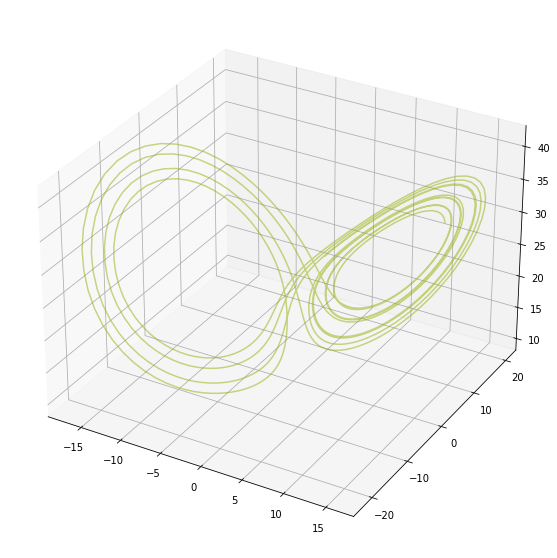

2.354869405288298


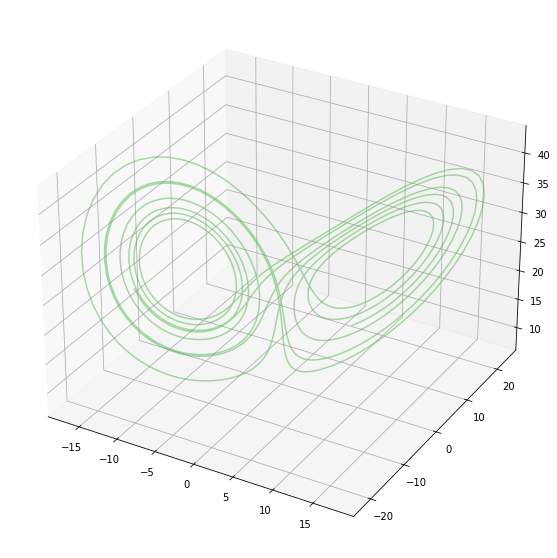

3.5858566172231576


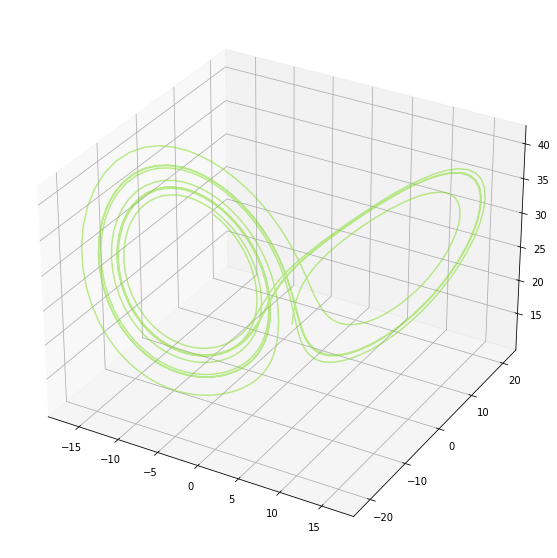

8.998907598213961


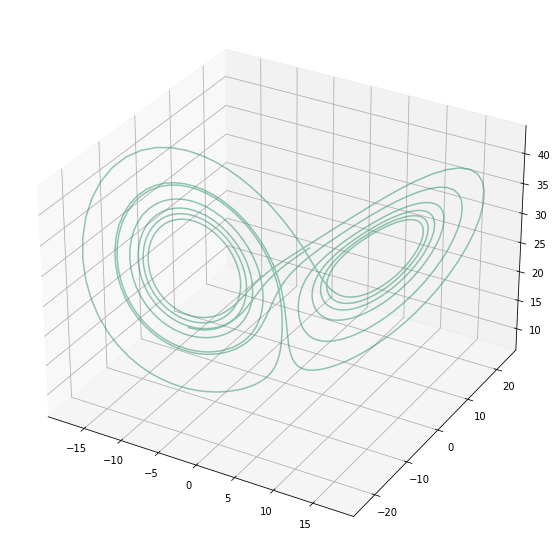

3.3156915760252392


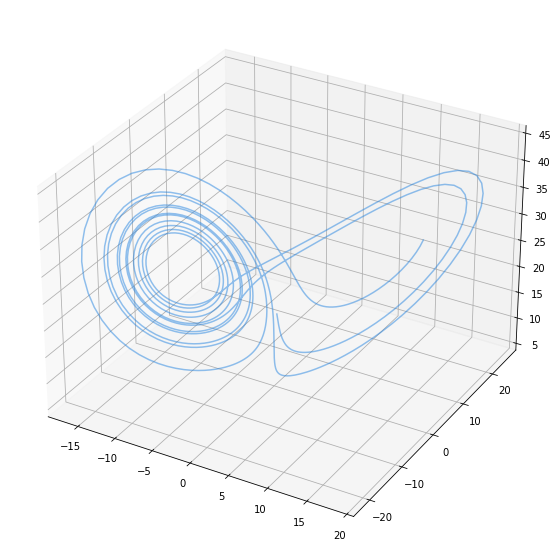

11.072139941208889


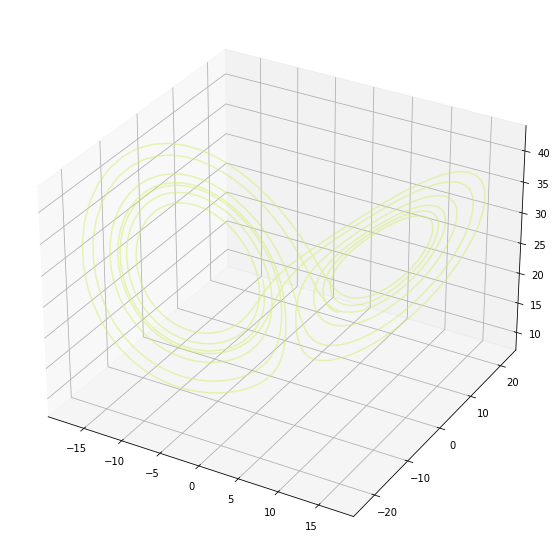

1.2101264980700535


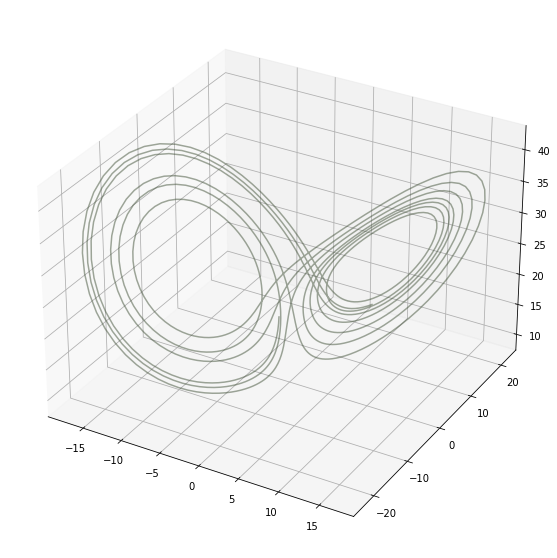

4.365868312263331


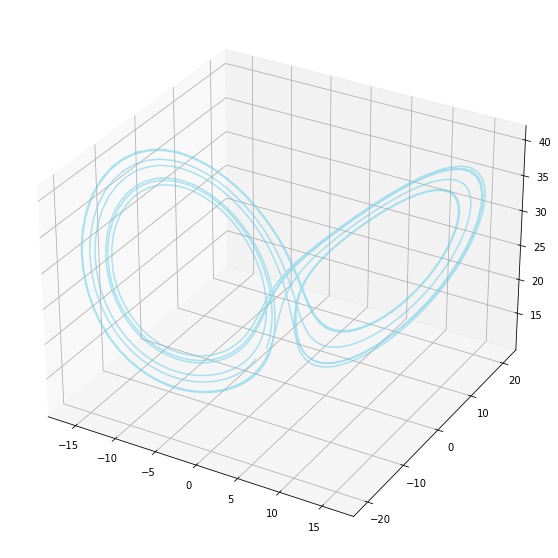

2.4100317352005334


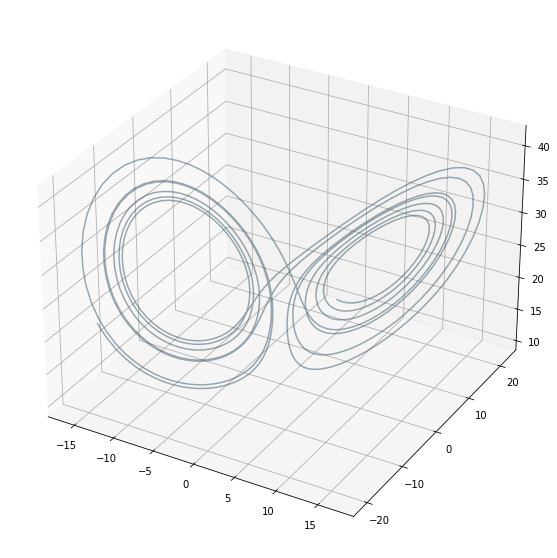

9.491007618125138


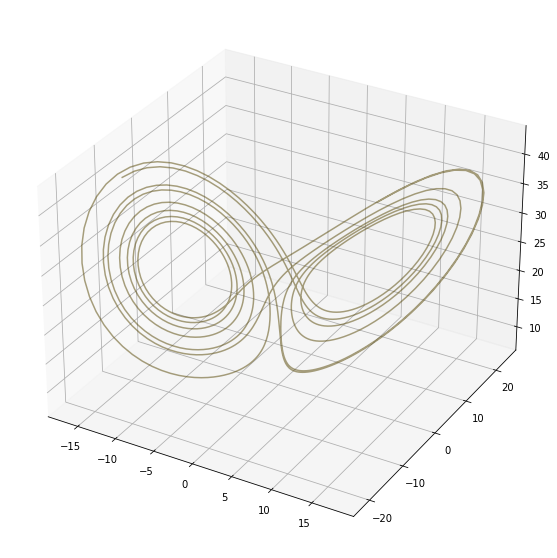

3.2813082318401143


In [5]:
LORENZPRMS2 = {
    "res_sz" : 100,
    "activ_f" : lambda x: 1/(1 + np.exp(-1*x)),
    "gamma" : 19.1,
    "mean_degree" : 2.0,
    "ridge_alpha" : 6e-7,
    "sigma" : 0.063,
    "spect_rad" : 8.472
}
for i in range(10):
    tr, Utr, ts, Uts = rc.train_test_orbit("lorenz", duration=20)
    rcomp = rc.ResComp(**LORENZPRMS2)
    rcomp.train(tr, Utr)
    pre = rcomp.predict(ts, r0=rcomp.r0)
    rc.plot3d(pre)
    print(derivativenorm(ts, pre, "lorenz"))

## New Algorithm

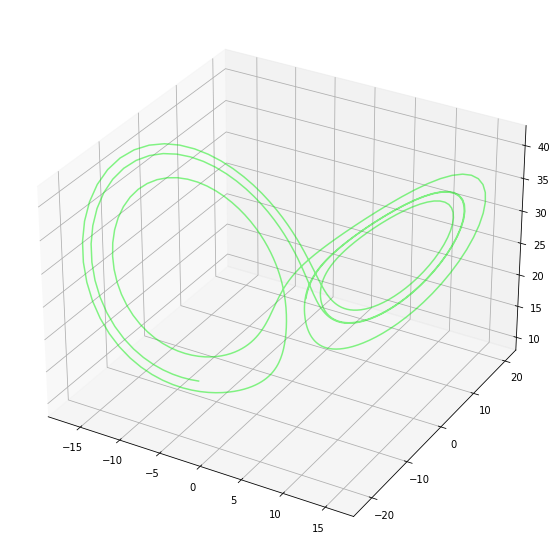

1.1842831919804078


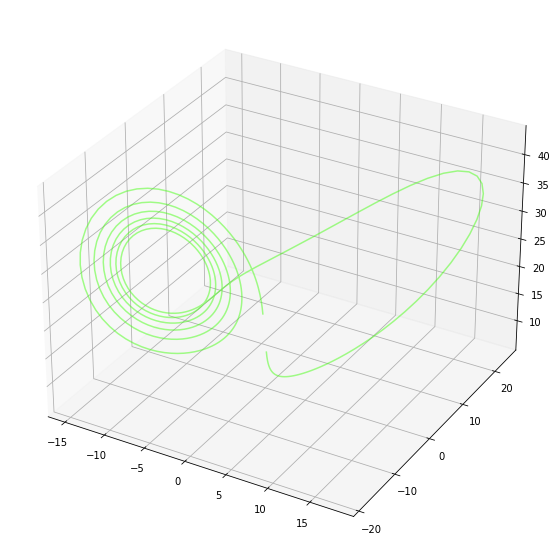

0.8743714594772799


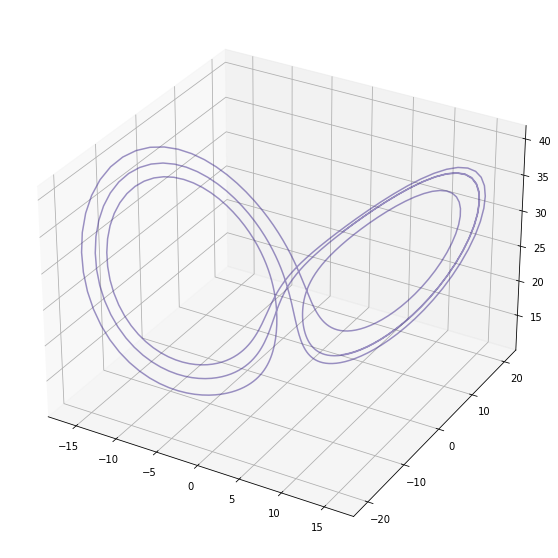

0.22432259579527591


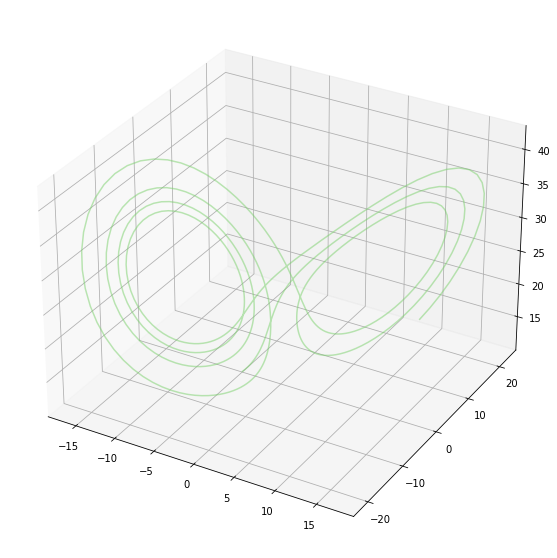

0.3867583940236936


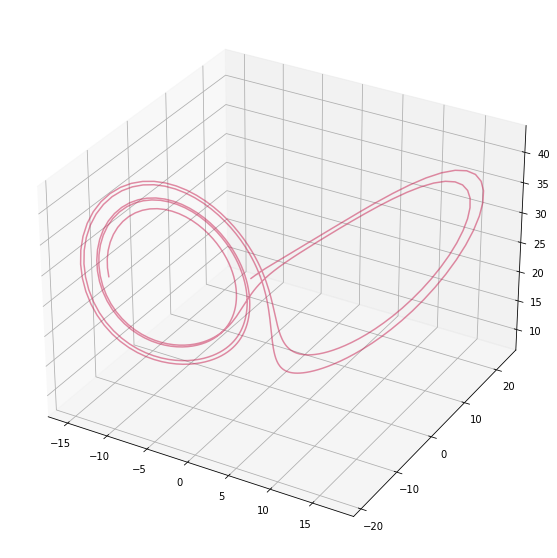

0.40601915609871214


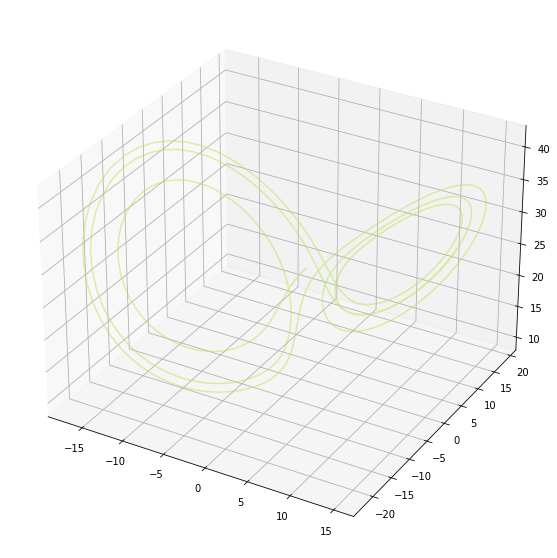

0.7499335808427607


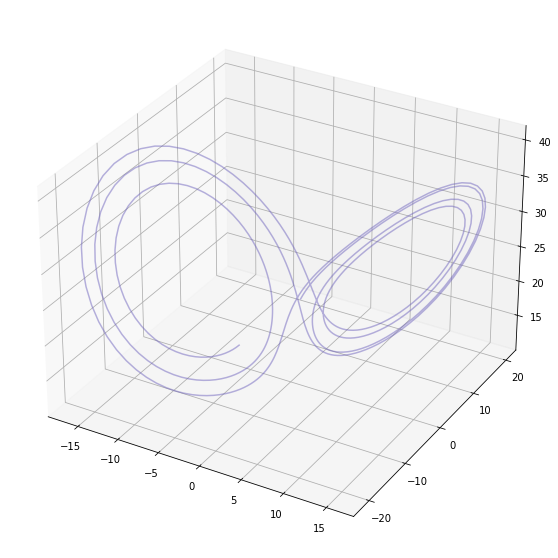

7.875806019386966


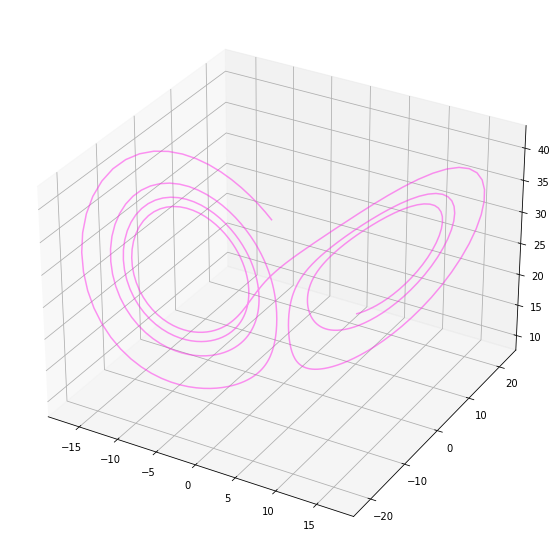

0.33466135703682853


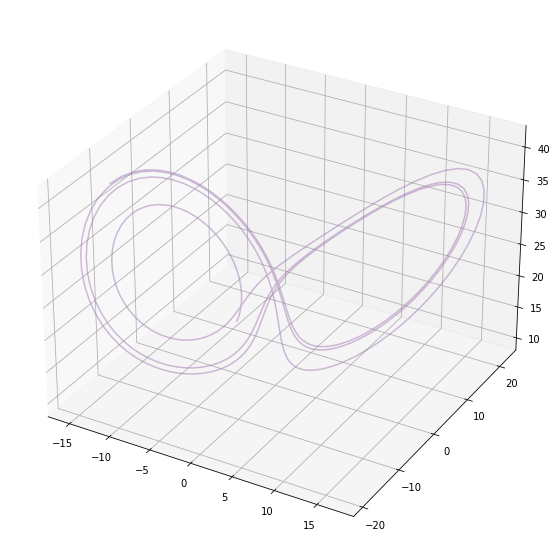

0.22586910244920122


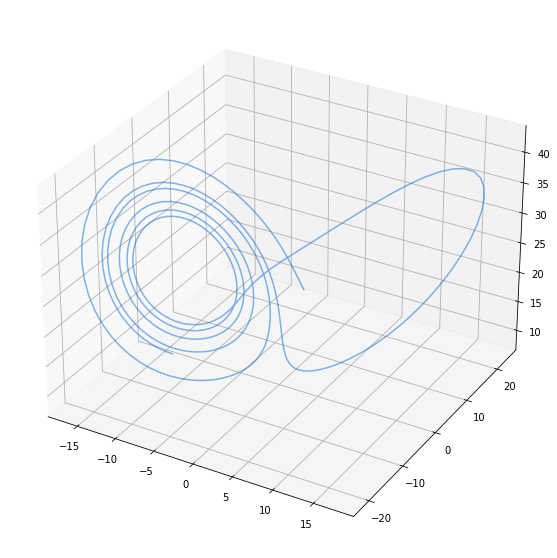

0.6558756115218676


In [13]:
LORENZPRMS2 = {
    "res_sz" : 100,
    "activ_f" : lambda x: 1/(1 + np.exp(-1*x)),
    "gamma" : 19.1,
    "mean_degree" : 2.0,
    "ridge_alpha" : 6e-7,
    "sigma" : 0.063,
    "spect_rad" : 8.472
}
for i in range(10):
    tr, Utr, ts, Uts = rc.train_test_orbit("lorenz", duration=10)
    rcomp = rc.ResComp(**LORENZPRMS2)
    rcomp.train(tr, Utr)
    pre = rcomp.predict(ts, r0=rcomp.r0)
    rc.plot3d(pre)
    print(derivativenorm(ts, pre, "lorenz", order=2))